<a href="https://colab.research.google.com/github/Simolaaaab/AI-Cybersecurity/blob/main/Lab1_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
# Importing the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

from scipy import stats

In [121]:
df = pd.read_csv('/content/drive/MyDrive/LAB_AI&C/dataset_lab_1.csv')
df

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,303376,3.033760e+04,0,749.4,1448,12743.263,0,0,19.833334,98776.15,322.16666,119,6,36.258636,6,443,Benign
1,117,1.170000e+02,0,0.0,0,0.000,1,0,0.000000,0.00,0.00000,0,1,17094.018000,1,52631,Benign
2,142,1.420000e+02,0,0.0,0,84507.040,0,0,6.000000,0.00,6.00000,6,2,14084.507000,2,80,Benign
3,191,6.366667e+01,0,52.0,52,921465.940,1,0,36.000000,0.00,42.40000,36,2,20942.408000,2,53,Benign
4,4,4.000000e+00,0,0.0,0,3000000.000,0,0,6.000000,0.00,6.00000,6,2,500000.000000,2,49467,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0,0.0,0,0.000,0,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,80,Brute Force
31503,5862561,1.954187e+06,0,0.0,0,0.000,0,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,80,Brute Force
31504,5854872,1.951624e+06,0,0.0,0,0.000,0,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,80,Brute Force
31505,5555547,1.851849e+06,0,0.0,0,0.000,0,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,80,Brute Force


In [122]:
print(df.info())
print("SHAPE originally:", df.shape)
print("")

print("null values: ",df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31507 entries, 0 to 31506
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flow Duration           31507 non-null  int64  
 1   Flow IAT Mean           31507 non-null  float64
 2   Fwd PSH Flags           31507 non-null  int64  
 3   Bwd Packet Length Mean  31507 non-null  float64
 4   Bwd Packet Length Max   31507 non-null  int64  
 5   Flow Bytes/s            31487 non-null  float64
 6   Down/Up Ratio           31507 non-null  int64  
 7   SYN Flag Count          31507 non-null  int64  
 8   Fwd Packet Length Mean  31507 non-null  float64
 9   Fwd IAT Std             31507 non-null  float64
 10  Packet Length Mean      31507 non-null  float64
 11  Fwd Packet Length Max   31507 non-null  int64  
 12  Subflow Fwd Packets     31507 non-null  int64  
 13  Flow Packets/s          31507 non-null  float64
 14  Total Fwd Packets       31507 non-null

In [123]:




df_inf= df[df.columns[:-1]]
has_infinite = np.isinf(df_inf).sum()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print("null values: ",df.isnull().sum())


df = df.dropna()
print("SHAPE after missing value",df.shape)




print("\n\n\n")
print("before duplicated remopval",df.size)
print("duplicates:", df.duplicated().sum())
df = df.drop_duplicates()
print("SHAPE after duplicates removal",df.shape)
df.size



null values:  Flow Duration              0
Flow IAT Mean              0
Fwd PSH Flags              0
Bwd Packet Length Mean     0
Bwd Packet Length Max      0
Flow Bytes/s              27
Down/Up Ratio              0
SYN Flag Count             0
Fwd Packet Length Mean     0
Fwd IAT Std                0
Packet Length Mean         0
Fwd Packet Length Max      0
Subflow Fwd Packets        0
Flow Packets/s            27
Total Fwd Packets          0
Destination Port           0
Label                      0
dtype: int64
SHAPE after missing value (31480, 17)




before duplicated remopval 535160
duplicates: 2094
SHAPE after duplicates removal (29386, 17)


499562

In [124]:
direction_mapping = {
    'Benign': 0,    # North
    'PortScan': 1,   # Northeast
    'DoS Hulk': 2,    # East
    'Brute Force': 3,   # Southeast
}

print(df['Label'])
# Replace the string values with numerical values
df['Label'] = df['Label'].map(direction_mapping)

# Resetting the index
df.tail()

0             Benign
1             Benign
2             Benign
3             Benign
4             Benign
            ...     
31502    Brute Force
31503    Brute Force
31504    Brute Force
31505    Brute Force
31506    Brute Force
Name: Label, Length: 29386, dtype: object


,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
31502,5710955,1903651.6,0,0.0,0,0.0,0,0,0.0,4037277.8,0.0,0,3,0.700408,3,80,3
31503,5862561,1954187.0,0,0.0,0,0.0,0,0,0.0,4144374.8,0.0,0,3,0.682296,3,80,3
31504,5854872,1951624.0,0,0.0,0,0.0,0,0,0.0,4139029.8,0.0,0,3,0.683192,3,80,3
31505,5555547,1851849.0,0,0.0,0,0.0,0,0,0.0,3927356.5,0.0,0,3,0.720001,3,80,3
31506,5018204,1672734.6,0,0.0,0,0.0,0,0,0.0,3547404.8,0.0,0,3,0.797098,3,80,3


In [125]:
from sklearn.model_selection import train_test_split

# I tuoi dati iniziali
X = df[df.columns[:-1]]
y = df['Label'].values
seed = 42

# Primo split: 60% train, 40% temporaneo
# Aggiungi stratify=y per mantenere le proporzioni delle classi originali
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=seed,
                                                    stratify=y)

# Secondo split: dividi il set temporaneo in 50% validation e 50% test
# Aggiungi stratify=y_temp per mantenere le proporzioni nel nuovo split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                test_size=0.5,
                                                random_state=seed,
                                                stratify=y_temp)

# Ora le forme dei tuoi set (60% train, 20% validation, 20% test)
print(f"Forma di X_train: {X_train.shape}")
print(f"Forma di X_val:   {X_val.shape}")
print(f"Forma di X_test:  {X_test.shape}")


(17631, 16)

In [150]:
def class_proportion(df):
  # 'y_train' contiene già tutte le etichette che vuoi contare.
  # Convertiamolo in una Serie di Pandas per usare value_counts() facilmente.
  y_train_series = pd.Series(df, name='Label')

  # Ora esegui il conteggio direttamente sulla Serie
  attack_counts_df = y_train_series.value_counts().reset_index()
  attack_counts_df.columns = ['label', 'Number of Occurrences']

  # Il resto del tuo codice ora funziona perfettamente
  total_occurrences = attack_counts_df['Number of Occurrences'].sum()
  attack_counts_df['% of Total'] = ((attack_counts_df['Number of Occurrences'] / total_occurrences) * 100).round(2)

  print("Distribuzione delle classi nel Training Set:")
  print(attack_counts_df)

class_proportion(y_train)
print("")
class_proportion(y_val)
print("")
class_proportion(y_test)

Distribuzione delle classi nel Training Set:
   label  Number of Occurrences  % of Total
0      0                  11515       65.31
1      1                   2958       16.78
2      2                   2292       13.00
3      3                    866        4.91

Distribuzione delle classi nel Training Set:
   label  Number of Occurrences  % of Total
0      0                   3900       66.36
1      1                    915       15.57
2      2                    776       13.20
3      3                    286        4.87

Distribuzione delle classi nel Training Set:
   label  Number of Occurrences  % of Total
0      0                   3827       65.11
1      1                    976       16.60
2      2                    800       13.61
3      3                    275        4.68


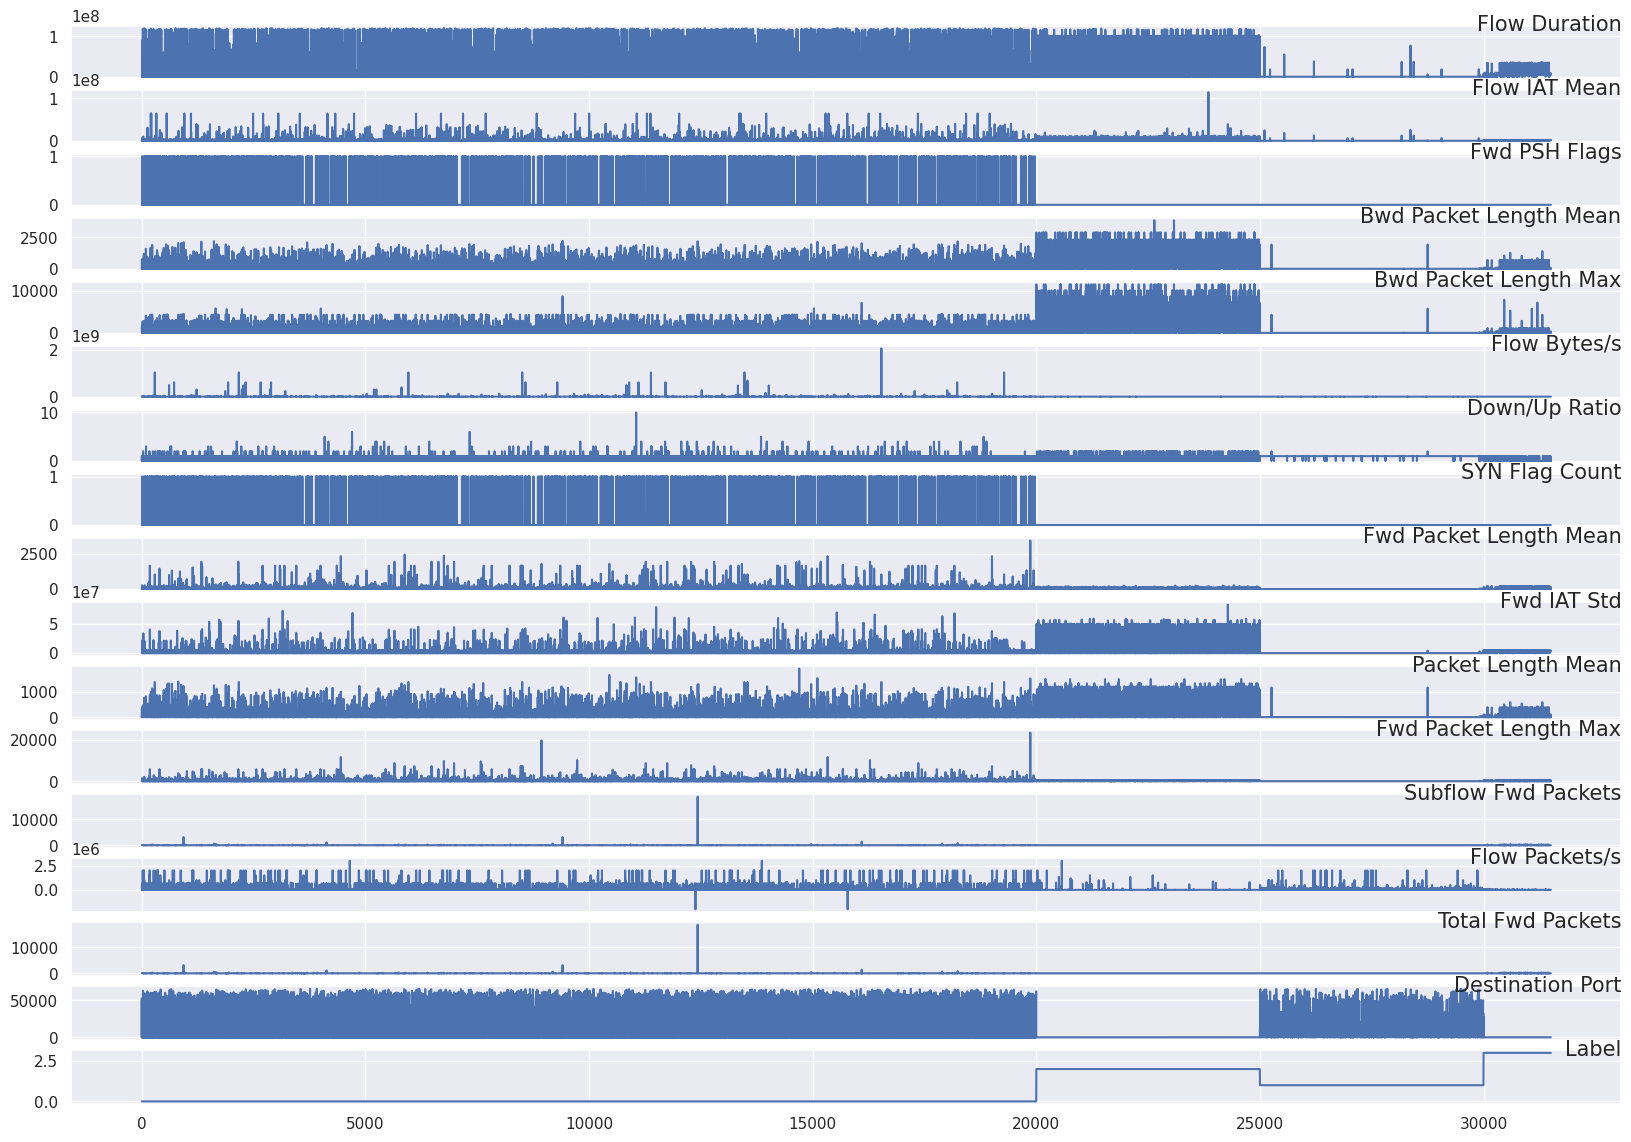

In [81]:
i = 1
# plot each column
plt.figure(figsize=(20,14))
for c in df.columns:
    plt.subplot(len(df.columns), 1, i)
    plt.plot(df[c])
    plt.title(c, y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()
plt.close()

In [126]:
 #6. Calculation of the percentage of outliers for each feature (df) – IQR -> dict with outliers percentage
def calculate_outliers_percentage(df):
    """
    Calculate the percentage of outliers for each feature in the DataFrame using the IQR method.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing the dataset.

    Returns:
    --------
    dict
        Dictionary containing the percentage of outliers for each feature.

    Notes:
    ------
    - Uses the Interquartile Range (IQR) method to identify outliers.
    - Outliers are defined as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
    - The function returns a dictionary with feature names as keys and outlier percentages as values.
    """

    outlier_percentages = {}  # empty dictionary to store outlier percentages

    for column in df.columns:
        Q1 = df[column].quantile(0.25)  # first quartile (Q1) for the column
        Q3 = df[column].quantile(0.75)  # third quartile (Q3) for the column
        IQR = Q3 - Q1  # Interquartile Range (IQR)

        lower_bound = Q1 - 1.5 * IQR  # lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # upper bound for outliers

        # Identify outliers in the column
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Calculate the percentage of outliers for the column
        outlier_percentage = len(outliers) / len(df) * 100

        # Store the outlier percentage in the dictionary
        outlier_percentages[column] = outlier_percentage

    return outlier_percentages

(23508, 16)
outlier_percentages: {'Flow Duration': 19.572060575123363, 'Flow IAT Mean': 16.288072145652542, 'Fwd PSH Flags': 3.9305768249106685, 'Bwd Packet Length Mean': 18.07044410413476, 'Bwd Packet Length Max': 22.549770290964776, 'Flow Bytes/s': 15.943508592819466, 'Down/Up Ratio': 0.2850093585162498, 'SYN Flag Count': 3.9305768249106685, 'Fwd Packet Length Mean': 5.610855878849754, 'Fwd IAT Std': 14.025012761613068, 'Packet Length Mean': 16.926152799047134, 'Fwd Packet Length Max': 5.062106516930406, 'Subflow Fwd Packets': 8.53326527139697, 'Flow Packets/s': 8.073847200952867, 'Total Fwd Packets': 8.53326527139697, 'Destination Port': 22.124383188701717}



<Figure size 1500x1000 with 0 Axes>

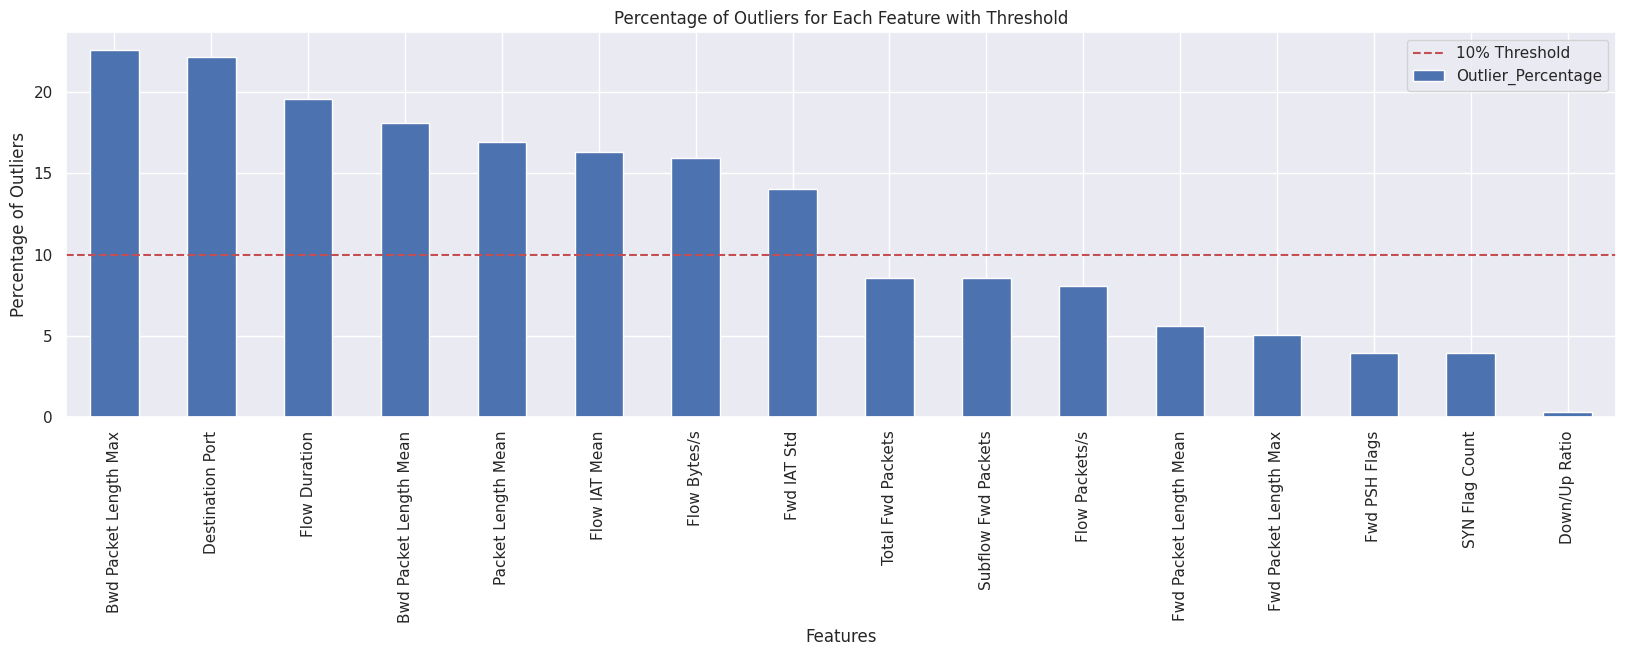

In [127]:
# Calculate outliers percentage
df_combine = pd.concat([X_train, X_val], ignore_index=True)
print(df_combine.shape)
outlier_percentages = calculate_outliers_percentage(df_combine)

# Convert to DataFrame for easier manipulation
outliers_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier_Percentage'])
print("outlier_percentages:", outlier_percentages)
print("")

# Define the threshold for concern
threshold = 10

# Identify features with high percentage of outliers
high_outlier_features = outliers_df[outliers_df['Outlier_Percentage'] > threshold]

# Plot the outlier percentages and highlight features above the threshold
plt.figure(figsize=(15, 10))
outliers_df.sort_values(by='Outlier_Percentage', ascending=False).plot(kind='bar', legend=False, figsize=(20, 5))
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold}% Threshold')
plt.xlabel('Features')
plt.ylabel('Percentage of Outliers')
plt.title('Percentage of Outliers for Each Feature with Threshold')
plt.legend()
plt.show()

In [128]:
# Ordina il DataFrame per 'Outlier_Percentage' in ordine decrescente
sorted_outliers_df = outliers_df.sort_values(by='Outlier_Percentage', ascending=False)

# Seleziona le prime 8 feature con il maggior numero di outlier
top_8_features = sorted_outliers_df.head(8)

# Stampa le prime 8 feature e le loro percentuali di outlier
print("Le 8 feature con la più alta percentuale di outlier sono:")
print(top_8_features)

# Estrai e stampa solo i nomi delle 8 feature con più outlier
top_8_feature_names = top_8_features.index.tolist()
print("\nLista delle 8 feature con il maggior numero di outlier:")
print(top_8_feature_names)

Le 8 feature con la più alta percentuale di outlier sono:
                        Outlier_Percentage
Bwd Packet Length Max            22.549770
Destination Port                 22.124383
Flow Duration                    19.572061
Bwd Packet Length Mean           18.070444
Packet Length Mean               16.926153
Flow IAT Mean                    16.288072
Flow Bytes/s                     15.943509
Fwd IAT Std                      14.025013

Lista delle 8 feature con il maggior numero di outlier:
['Bwd Packet Length Max', 'Destination Port', 'Flow Duration', 'Bwd Packet Length Mean', 'Packet Length Mean', 'Flow IAT Mean', 'Flow Bytes/s', 'Fwd IAT Std']


In [92]:
df.describe()

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
count,2.939300e+04,2.939300e+04,29393.000000,29393.000000,29393.000000,2.939300e+04,29393.000000,29393.000000,29393.000000,2.939300e+04,29393.000000,29393.000000,29393.000000,2.939300e+04,29393.000000,29393.000000,29393.000000
mean,1.766077e+07,1.541692e+06,0.039397,331.683003,960.150580,inf,0.665499,0.039397,46.779004,4.988512e+06,174.156158,182.186303,6.486170,inf,6.486170,7839.248324,0.573844
std,3.622154e+07,4.249150e+06,0.194541,621.753351,1999.153187,NaN,0.527006,0.194541,118.792439,1.220722e+07,297.376521,517.066528,113.311797,NaN,113.311797,17576.103300,0.893902
min,-1.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,-1.200000e+07,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,-2.000000e+06,1.000000,0.000000,0.000000
25%,8.300000e+01,6.133333e+01,0.000000,6.000000,6.000000,1.212899e+02,0.000000,0.000000,2.000000,0.000000e+00,3.333333,2.000000,1.000000,1.279789e+00,1.000000,53.000000,0.000000
50%,3.111100e+04,1.111700e+04,0.000000,63.000000,69.000000,5.135784e+03,1.000000,0.000000,34.000000,0.000000e+00,52.333332,37.000000,2.000000,1.149196e+02,2.000000,80.000000,0.000000
75%,5.488905e+06,9.050252e+05,0.000000,202.000000,425.000000,1.481481e+05,1.000000,0.000000,51.000000,1.958825e+06,128.125000,264.000000,5.000000,2.684564e+04,5.000000,1217.000000,1.000000
max,1.199985e+08,1.140000e+08,1.000000,3865.000000,11595.000000,inf,10.000000,1.000000,3431.806400,8.280000e+07,1903.272700,23360.000000,18605.000000,inf,18605.000000,65533.000000,3.000000


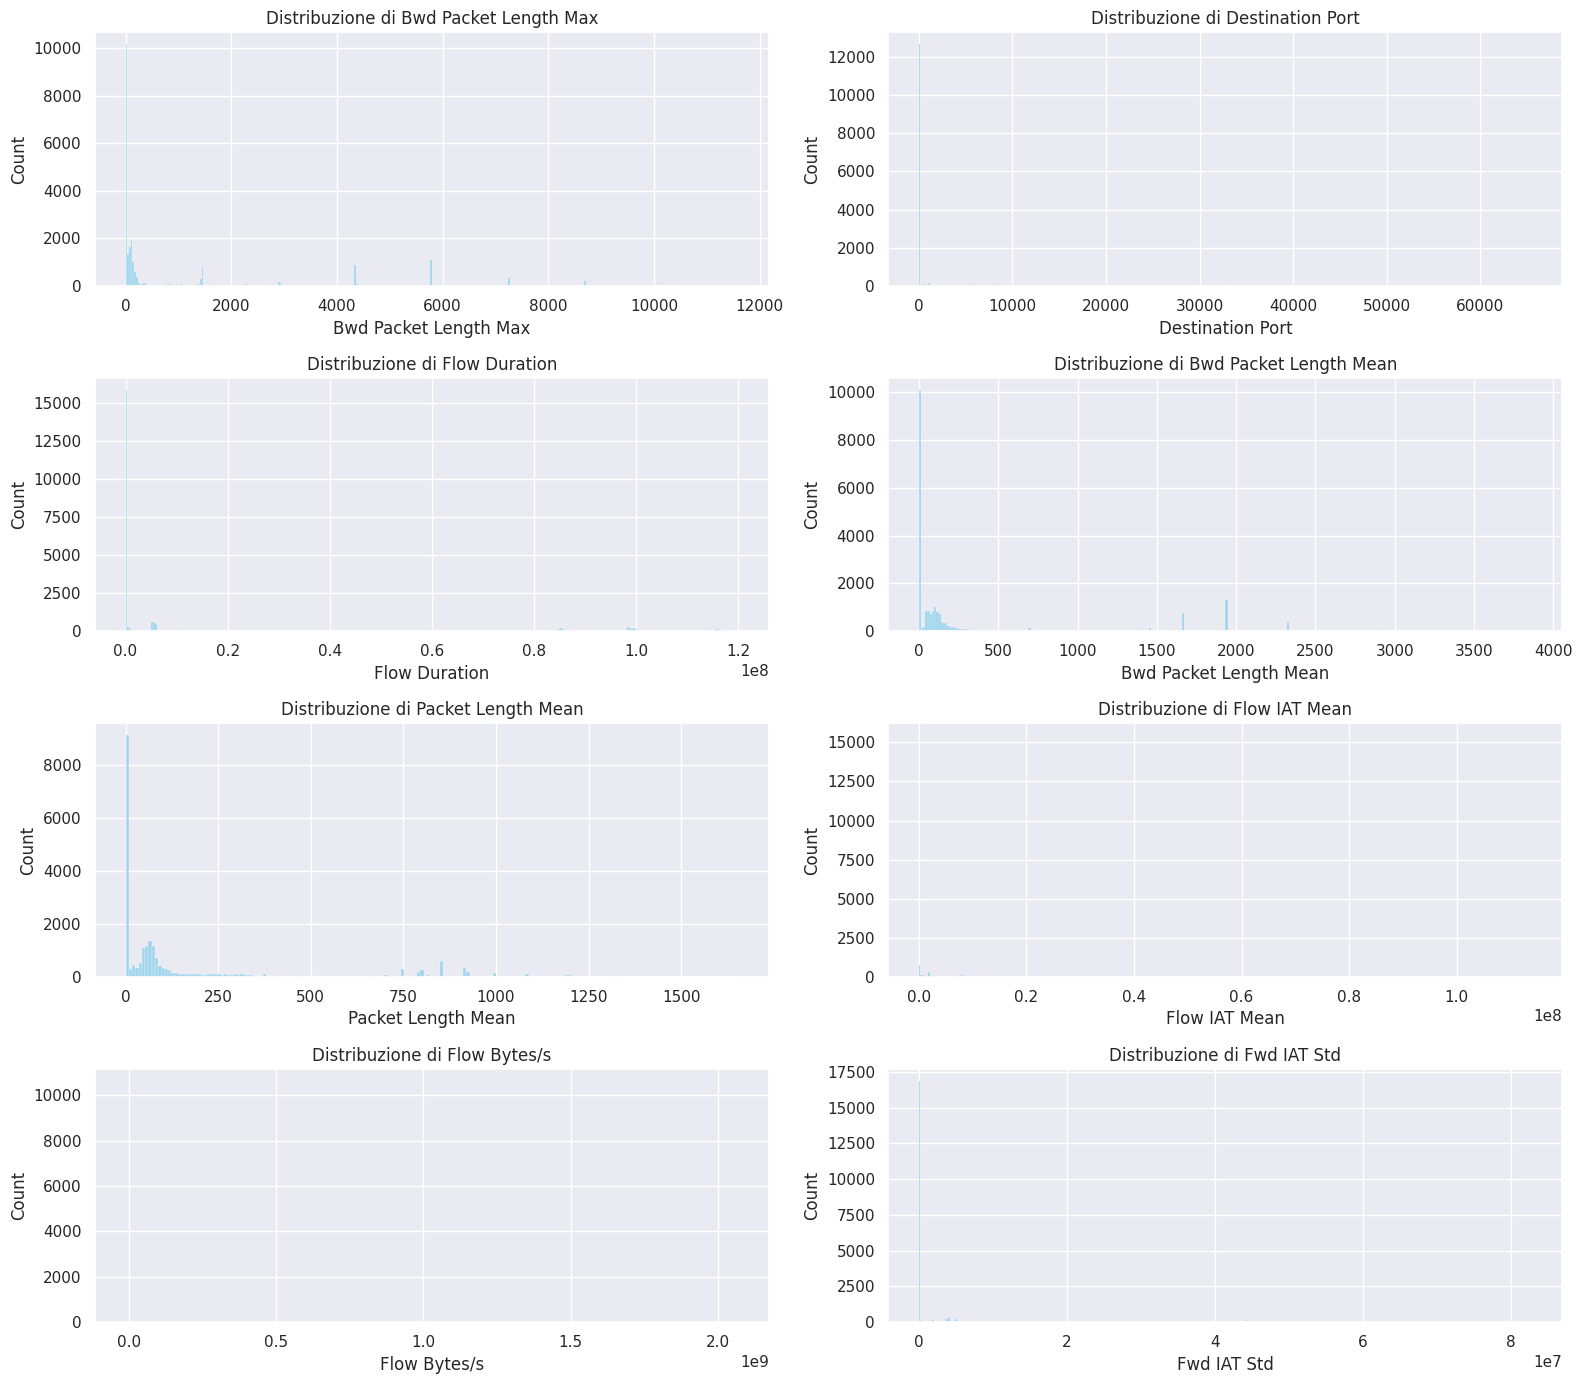

In [102]:
df_out = df_combine[top_8_feature_names]
import seaborn as sns
import matplotlib.pyplot as plt

# df_out è il tuo DataFrame con le 8 feature
# top_8_feature_names è la lista dei nomi delle colonne

sns.set(style="darkgrid")
fig, axs = plt.subplots(4, 2, figsize=(16, 14)) # Ho cambiato a 4x2 per usare tutti i subplot
axs = axs.flatten() # Appiattisce l'array di assi per iterare più facilmente

for i, c in enumerate(df_out.columns):
    axs[i].set_title(f"Distribuzione di {c}")
    # Rimuovi kde=True per un'elaborazione molto più veloce
    sns.histplot(data=df_out, x=c, kde=False, color="skyblue", ax=axs[i])

plt.tight_layout()
plt.show()
plt.close()

In [137]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [140]:
# Convert data to PyTorch tensors

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)